<a href="https://colab.research.google.com/github/VM-Janani/Linear-Algebra-The-Coding-Way/blob/main/Eigenvalues%20and%20Eigenvectors/EigenValuesVectors_Notebook6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PageRank Algorithm: PageRank is an algorithm used by search engines to assign a numerical weight to each element of a hyperlinked set of documents, such as web pages, with the purpose of measuring its relative importance within the set.

itis a method used by search engines to rank web pages based on their importance and relevance. It was developed by Larry Page and Sergey Brin at Stanford University, which later became the foundation of Google's search engine.








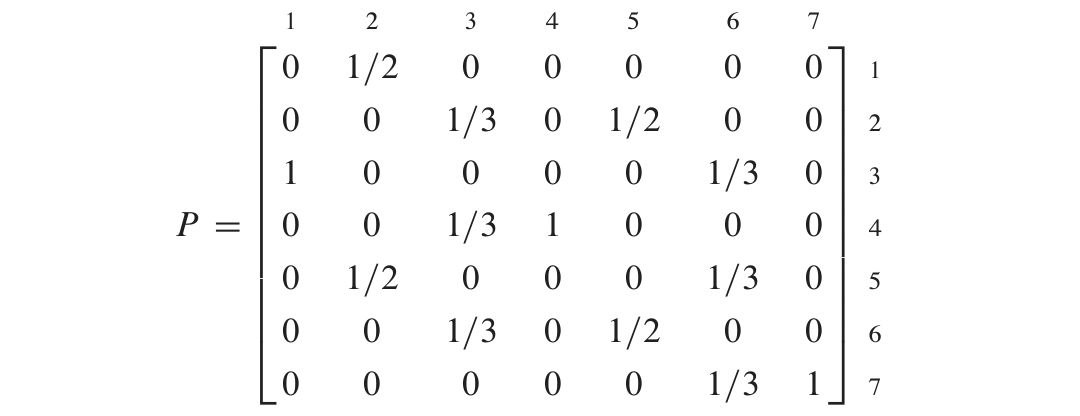

In [ ]:
import numpy as np

In [ ]:
#probablity matrix of the pages
A = np.array([[0, 1/2, 0, 0, 0, 0, 0],
              [0, 0, 1/3, 0, 1/2, 0, 0],
              [1, 0, 0, 0, 0, 1/3, 0],
              [0, 0, 1/3, 1, 0, 0, 0],
              [0, 1/2, 0, 0, 0, 1/3, 0],
              [0, 0, 1/3, 0, 1/2, 0, 0],
              [0, 0, 0, 0, 0, 1/3, 1]])

In [23]:
import numpy as np

def steady_state_vector(vector, A):
    n = 100
    count = 0
    for i in range(n):
        pvector = np.dot(A, vector)
        if np.allclose(pvector, vector, atol=0.1e-2):
            count += 1
        else:
            count = 0
        if count == 10:
            print("Number of iteration:", i)
            break
        vector = pvector
    print("\nRank of each page")
    for i, rank in enumerate(vector):
        print(f"Page {i+1}: {rank}")

A user starts navigating from Page 1 and
reaches Page 4. What happens to the user when she/he
reaches Page 4?

here the problem is when a user land on page 4 the probability moving to other pages are zero.this is called Dangling nodes

Dangling nodes: Pages with no outbound links. Dangling nodes can cause problems because they effectively absorb PageRank without redistributing it.

The 7th page also has the same issue.

solution:
To prevent loss of importance, redistribute the importance of dangling nodes evenly across all pages. This ensures that every page can receive some importance from the dangling nodes.
Mathematically, we achieve this by replacing the columns of ( A ) corresponding to dangling nodes with uniform values 1/(no of rows)




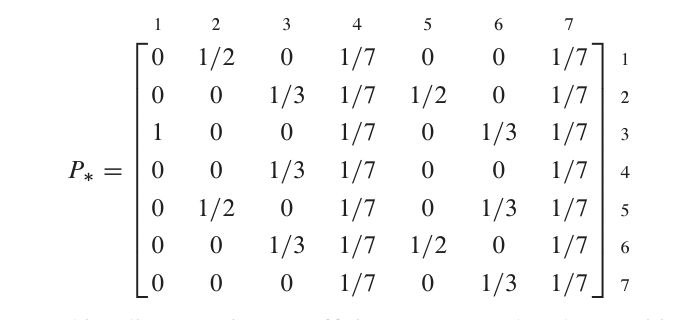

In [5]:
num_of_rows = len(A)
# Find the dangling node and replace the entire column with 1/num_of_rows
for i in range(num_of_rows):
    if A[i][i] == 1:
        for j in range(num_of_rows):
            A[j][i] = 1/num_of_rows

# Adjusted transition matrix
print("Adjusted transition matrix A:\n",A)



Adjusted transition matrix A:
 [[0.         0.5        0.         0.14285714 0.         0.
  0.14285714]
 [0.         0.         0.33333333 0.14285714 0.5        0.
  0.14285714]
 [1.         0.         0.         0.14285714 0.         0.33333333
  0.14285714]
 [0.         0.         0.33333333 0.14285714 0.         0.
  0.14285714]
 [0.         0.5        0.         0.14285714 0.         0.33333333
  0.14285714]
 [0.         0.         0.33333333 0.14285714 0.5        0.
  0.14285714]
 [0.         0.         0.         0.14285714 0.         0.33333333
  0.14285714]]


There could be another problem, the problem of cycles. If page j is linked only to page i and page i linked only to page j, a random surfer entering either page would be condemned to spend eternity hopping from page i to j and back again.
this creats an loop between the two pages j and i

 solution:

The transition matrix ( A ) represents the connectivity of the web graph, where
 is the probability of moving from page ( i ) to page ( j )

 We create a matrix (G) representing the Google Matrix by combining the adjusted transition matrix (A) with a teleportation matrix.

 Teleportation ((1 - p) * H): Randomly jumping to any page with probability (1 - p), ensuring uniform distribution.

Link Navigation (p * A): Following links with probability ( p ) based on PageRank scores and link structure represented by matrix ( A ).

Equation:

( G = (1 - p) * H + p * A )


In [21]:
p = 0.5
#The Google matrix
H = (1/num_of_rows)*np.ones((num_of_rows, num_of_rows))
G = (1 - p)*H + p*A
print("Google Matrix:\n",G)


Google Matrix:
 [[0.07142857 0.32142857 0.07142857 0.14285714 0.07142857 0.07142857
  0.14285714]
 [0.07142857 0.07142857 0.23809524 0.14285714 0.32142857 0.07142857
  0.14285714]
 [0.57142857 0.07142857 0.07142857 0.14285714 0.07142857 0.23809524
  0.14285714]
 [0.07142857 0.07142857 0.23809524 0.14285714 0.07142857 0.07142857
  0.14285714]
 [0.07142857 0.32142857 0.07142857 0.14285714 0.07142857 0.23809524
  0.14285714]
 [0.07142857 0.07142857 0.23809524 0.14285714 0.32142857 0.07142857
  0.14285714]
 [0.07142857 0.07142857 0.07142857 0.14285714 0.07142857 0.23809524
  0.14285714]]


In [22]:
vector = np.array([1, 0, 0, 0, 0, 0, 0])
rank_of_each_pages = steady_state_vector(vector, G)


Number of iteration: 15

Rank of each page
Page 1: 0.12689257431908474
Page 2: 0.15573179469488418
Page 3: 0.17736121058526766
Page 4: 0.117519827271089
Page 5: 0.15284787391232446
Page 6: 0.15573179469488418
Page 7: 0.11391492452246488
